In [ ]:
!pip install control

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction)

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 14 # tamanho da letraimport matplotlib.pyplot as plt

In [ ]:
#Condições Iniciais Nulas
y0 = [0,0]

# fator de amortecimento entre 0 e 1
plant_tf3 = TransferFunction(6, [1,2,6])
print("TF3 =\n", plant_tf3)

t_ = np.linspace(0, 6, 1001) # vetor tempo

# resposta ao degrau unitário
plt.figure(1)
tout3, yout3 = ctl.step_response(plant_tf3, T=t_)
plt.plot(tout3, yout3, 'k', linewidth=1.5)
plt.grid(alpha=0.3)
plt.xlabel('tempo')
plt.ylabel('resposta')
plt.show()

print("Valor máximo da resposta (valor de pico)")
yout3.max() # valor máximo do vetor resposta

In [1]:
# Métricas no domínio do tempo relacionadas a entrada degrau 
ctl.step_info(plant_tf3)

NameError: name 'ctl' is not defined

In [17]:
# Cálculo das métricas no domínio do tempo relacionadas a entrada degrau
# usando frequência natural e fator de amortecimento 
wn = np.sqrt(6) # usando frequência natural
fator = 2/(2*wn) # fator de amortecimento

# tempo de acomodação
ts = 4/(fator*wn)
print('ts=',ts)

# tempo de pico
tp = np.pi/(wn*np.sqrt(1-fator**2))
print('tp=',tp)

# sobresinal 
ms = np.exp(-fator*np.pi/(np.sqrt(1-fator**2)))*100
print('ms=',ms)

ts= 4.0
tp= 1.4049629462081454
ms= 24.53761484012086


Sobressinal: 24.850000%
Mp: 1.245375
tp: 1.4
ts: 3.4


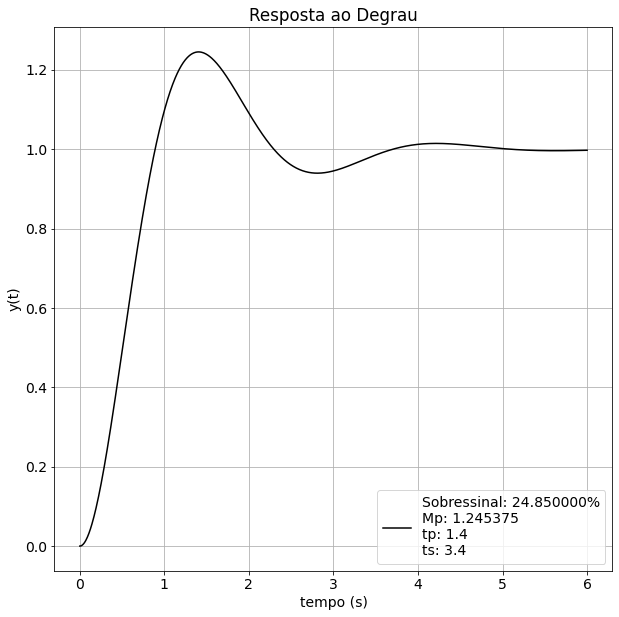

In [18]:
# Cálculo das métricas no domínio do tempo relacionadas a entrada degrau
# usando https://gist.github.com/kennethsinder/1e17f8b1c4aacffd996369a7a4346fe0


t = tout3 
y = yout3 
plt.plot(t, y,'k', linewidth=1.5)
plt.title('Resposta ao Degrau')
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('y(t)')

info = "Sobressinal: %f%s"%(round((y.max()/y[-1]-1)*100,2),'%')
info += "\nMp: %f" % (y.max())

try:
    Ts = round(t[next(len(y)-i for i in range(2,len(y)-1) if abs(y[-i]/y[-1])<0.98)]-t[0],2)
except StopIteration:
    Ts = "unknown"

try:
    Tp = round(t[next(len(y)-i for i in range(2,len(y)-1) if y[-i] == y.max())]-t[0],2)
except StopIteration:
    Tp = "unknown"

info +="\ntp: %s"%(Tp)
info +="\nts: %s"%(Ts)
print(info)   # print legenda
plt.legend([info], loc=4)

plt.show()    # mostra a resposta